In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv("C:/Users/TUF/Downloads/SIH_PROJECT/dataset/india_earthquakes_1995_2015.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2015-12-30T05:44:20.410Z,38.9667,74.6956,54.75,4.4,mb,NaN,112.0,2.304,0.72,...,2016-03-18T01:13:08.040Z,"108 km NE of Murghob, Tajikistan",earthquake,8.1,8.7,0.138,15.0,reviewed,us,us
1,2015-12-29T07:15:01.440Z,36.4237,70.6786,206.22,4.5,mb,NaN,74.0,0.705,0.85,...,2022-08-02T01:31:16.435Z,"Hindu Kush region, Afghanistan",earthquake,6.7,3.7,0.080,45.0,reviewed,us,us
2,2015-12-29T00:44:41.840Z,35.8427,68.2822,47.34,4.0,mb,NaN,101.0,1.440,1.09,...,2016-03-18T01:13:05.040Z,"19 km WSW of ?uk?mat? Dahanah-ye Gh?r?, Afghan...",earthquake,4.5,19.7,0.231,5.0,reviewed,us,us
3,2015-12-29T00:07:03.970Z,34.9819,73.0507,48.92,4.7,mb,NaN,50.0,1.340,0.87,...,2022-08-02T01:25:35.426Z,Pakistan,earthquake,6.4,7.0,0.078,49.0,reviewed,us,us
4,2015-12-28T04:53:54.010Z,35.9606,70.9850,100.60,4.1,mb,NaN,107.0,1.208,0.56,...,2016-03-18T01:13:04.040Z,"60 km N of P?r?n, Afghanistan",earthquake,8.5,9.1,0.261,4.0,reviewed,us,us


In [3]:
df['time'] = pd.to_datetime(df['time'], errors="coerce")
df['year'] = df['time'].dt.year

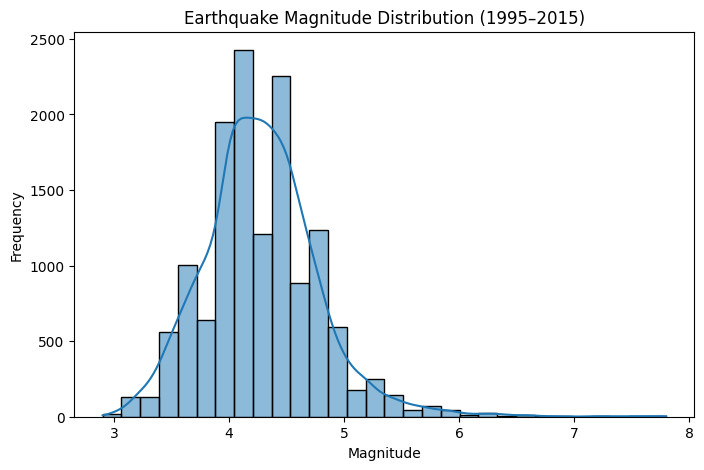

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mag'].dropna(), bins=30, kde=True)
plt.title("Earthquake Magnitude Distribution (1995–2015)")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

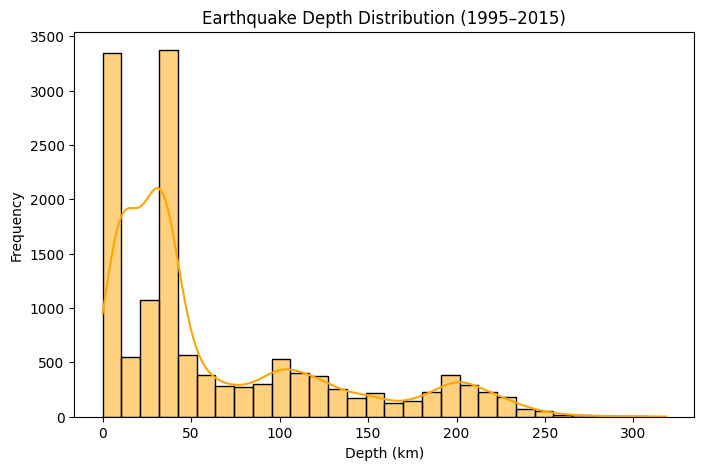

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['depth'].dropna(), bins=30, kde=True, color="orange")
plt.title("Earthquake Depth Distribution (1995–2015)")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

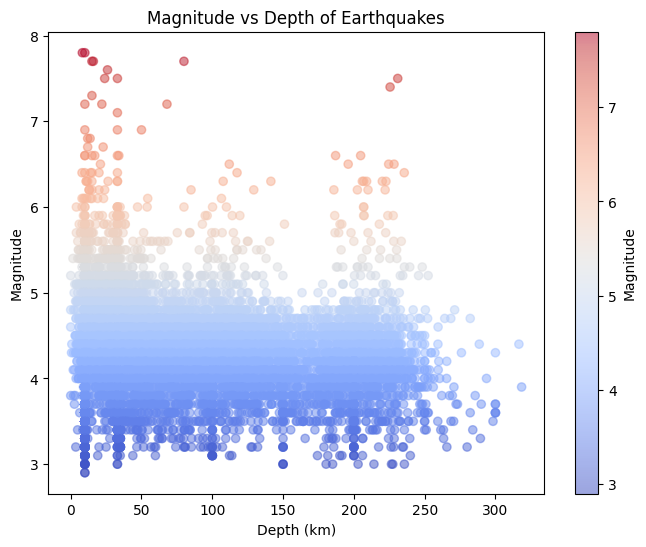

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['depth'], df['mag'], alpha=0.5, c=df['mag'], cmap="coolwarm")
plt.colorbar(label="Magnitude")
plt.title("Magnitude vs Depth of Earthquakes")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

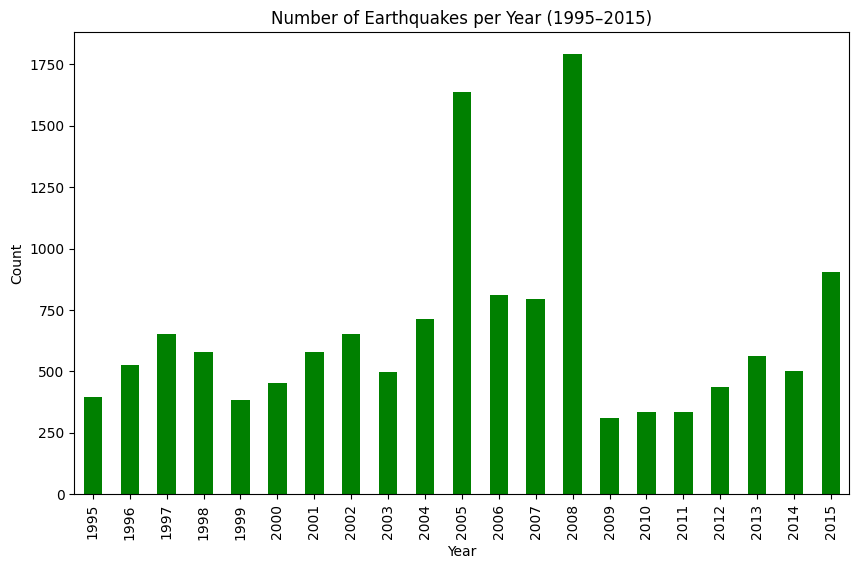

In [7]:
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind="bar", color="green")
plt.title("Number of Earthquakes per Year (1995–2015)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [9]:
df_copy = df.copy()

In [10]:
df_copy = df_copy.dropna(subset=["latitude", "longitude", "mag"])

In [13]:
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5, tiles="CartoDB positron")

In [14]:
heat_data = [[row["latitude"], row["longitude"], row["mag"]] for _, row in df_copy.iterrows()]
HeatMap(heat_data, radius=8, blur=6, max_zoom=6).add_to(m)

In [15]:
m.save("earthquake_hotspots_india.html")
print("✅ Map saved as earthquake_hotspots_india.html")

✅ Map saved as earthquake_hotspots_india.html
